In [1]:
%matplotlib inline
from imgseries import GreyLevel

In [2]:
basefolder = 'data'  # where analysis data etc. will be saved into and loaded from
folders = 'data/img1', 'data/img2'

# Minimal analysis

In [3]:
gl = GreyLevel(folders, savepath=basefolder)

# or, if working with a tiff stack: gl = GreyLevel(stack='stack.tif', savepath=basefolder)

The line below assumes that analysis zones have already been defined and saved in the metadata file (see details further below)

In [4]:
gl.zones.load()

Now, run analysis on these zones.

In [5]:
gl.run()

100%|██████████| 50/50 [00:01<00:00, 28.93it/s]


Note that for large numbers of images, it can be faster to distribute computation across multiple computer cores:

In [6]:
gl.run(parallel=True)  # has some startup delay due to multiprocessing initiation

100%|██████████| 50/50 [00:19<00:00,  2.54it/s]


Results are stored in the `data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)) 

In [7]:
gl.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,66.132589,85.909301,85.130828
1,img1,img-00611.png,1.599832e+09,66.038452,85.864615,85.090533
2,img1,img-00612.png,1.599832e+09,66.046244,85.906713,85.159370
3,img1,img-00613.png,1.599832e+09,65.949209,85.842308,85.072840
4,img1,img-00614.png,1.599832e+09,65.943252,85.809790,85.069224


Plot grey level of every zone as a function of time:

<AxesSubplot:xlabel='time (unix)'>

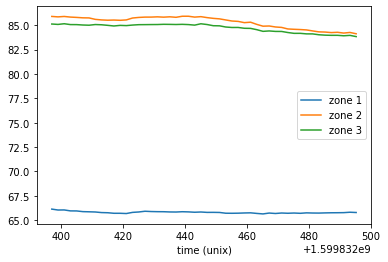

In [8]:
gl.data.set_index('time (unix)').filter(like='zone').plot()

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including zone info, path info, and code version info is also saved in a .json file at the same time. 

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call save().

In [10]:
gl.save()

ValueError: Reference at 'refs/heads/master' does not exist

*Note:* It is possible to avoid saving git repository information of codes (e.g. if they are not in a git repository), by passing `git=False` to `save()`

# Defining and viewing analysis zones

In [4]:
gl = GreyLevel(folders, savepath=basefolder)

Zone defining has to be done at least once.

**Important**: Matplotlib must be in an interactive mode to do so.

Defining does not need to be done again in the following situations:
- calling methods again from the same `gl` object, e.g. `gl.run()`
- calling `gl.zones.load()` to load zones data from saved metadata (.json) file.

In [6]:
gl.zones.define()  # define one zone using the first image of the series

In [7]:
gl.zones.define(3)  # define 3 zones using the first image of the series

In [9]:
gl.zones.define(3, num=10)  # define 3 zones using image #10 in the series

In [8]:
gl.zones.define(3, draggable=True)  # define 3 zones using draggable rectangles instead of clicks

Rectangle position recorded. Rectangle deleted.
Rectangle position recorded. Rectangle deleted.
Rectangle position recorded. Rectangle deleted.


Viewing analysis zones after defining or loading them:

In [9]:
gl.zones.data

{'zone 1': (24, 16, 138, 122),
 'zone 2': (446, 11, 153, 134),
 'zone 3': (24, 452, 548, 87)}

In [10]:
gl.zones.show()  # show zones on first image of series

<AxesSubplot:title={'center':'Analysis Zones (img #0)'}>

**Note**: At the moment, saving zones data is done by calling `gl.save()`, which saves both data and metadata. Be careful because calling `gl.save()` also overwrites saved analysis data (potentially with no data if no analysis has been run yet). This makes sure that metadata in .json files actually corresponds to the data in the .tsv file.

# Analyze only subset of images

In [12]:
gl = GreyLevel(folders, savepath=basefolder)

In [13]:
gl.zones.load()

In [14]:
gl.run(start=10)  # Analyze only from image #10
gl.data.head()

100%|██████████| 40/40 [00:00<00:00, 40.02it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
10,img1,img-00620.png,1.599832e+09,65.703018,85.538601,84.929872
11,img1,img-00621.png,1.599832e+09,65.703098,85.512587,84.991347
12,img1,img-00622.png,1.599832e+09,65.677596,85.551469,84.968100
13,img1,img-00623.png,1.599832e+09,65.795506,85.746643,85.024151
14,img1,img-00624.png,1.599832e+09,65.837389,85.807762,85.063412


In [15]:
gl.run(end=25)  # Analyze only up to image #25, not included
gl.data.tail()

100%|██████████| 25/25 [00:00<00:00, 42.56it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
20,img1,img-00630.png,1.599832e+09,65.832815,85.821329,85.081364
21,img1,img-00631.png,1.599832e+09,65.863555,85.927832,85.097895
22,img1,img-00632.png,1.599832e+09,65.846111,85.929161,85.073098
23,img1,img-00633.png,1.599832e+09,65.809573,85.841049,85.017693
24,img1,img-00634.png,1.599832e+09,65.834650,85.887483,85.155883


In [27]:
gl.run(skip=5)  # Analyze only every 5-th image
gl.data.head()

100%|██████████| 10/10 [00:00<00:00, 123.79it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,66.132589,85.909301,85.130828
5,img1,img-00615.png,1.599832e+09,65.873049,85.767413,85.029188
10,img1,img-00620.png,1.599832e+09,65.703018,85.538601,84.929872
15,img1,img-00625.png,1.599832e+09,65.911820,85.840350,85.068191
20,img1,img-00630.png,1.599832e+09,65.832815,85.821329,85.081364


# Manage image time information

It can be useful to save image time information and num/image correspondence in a file that can be used later for reference, i.e. if the images are copied or moved and lose their internal time information. To to so:

In [17]:
gl = GreyLevel(folders, savepath=basefolder)  # Note: here, one could user ImgSeries instead of GreyLevel
gl.info.head()  # see what file and timing info is availlable

,folder,filename,time (unix)
num,,,
0,img1,img-00610.png,1.599832e+09
1,img1,img-00611.png,1.599832e+09
2,img1,img-00612.png,1.599832e+09
3,img1,img-00613.png,1.599832e+09
4,img1,img-00614.png,1.599832e+09


In [18]:
gl.save_info()  # save into default filename (defined in config.py)

In [19]:
gl.save_info('Img_Files_SavingTest.tsv')  # save into custom filename. Here, extension must be specified

Now, to reload all file and timing info from a previously saved file, use:

In [20]:
gl.load_info('for-tests-do-not-modify/Img_Files_Saved.tsv')    # replaces all file data

But to keep folder / file info automatically detected by `GreyLevel` instantiation and modify only timing info using data from another file:

In [21]:
gl.load_time('for-tests-do-not-modify/Img_Files_Rounded.tsv')    # only updates times info
gl.info.head()

,folder,filename,time (unix)
num,,,
0,img1,img-00610.png,1599832397
1,img1,img-00611.png,1599832399
2,img1,img-00612.png,1599832401
3,img1,img-00613.png,1599832403
4,img1,img-00614.png,1599832405


In this last situation, the file must be tab-separated and contain at least `num` and `time (unix)` columns. The data present in the file must have rows cover at least all `num` values already present in `gl.info`.

# Load analysis data a posteriori

In [22]:
gl = GreyLevel(savepath=basefolder)  # no need to specify folders here
data = gl.load()
data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,66.132589,85.909301,85.130828
1,img1,img-00611.png,1.599832e+09,66.038452,85.864615,85.090533
2,img1,img-00612.png,1.599832e+09,66.046244,85.906713,85.159370
3,img1,img-00613.png,1.599832e+09,65.949209,85.842308,85.072840
4,img1,img-00614.png,1.599832e+09,65.943252,85.809790,85.069224


If one wants to use zone methods as above, one must first reload the zones using saved data:

In [23]:
gl.zones.load()  # dict of tuples (xmin, ymin, width height) for every zone analyzed
gl.zones.data

{'zone 1': [29, 16, 545, 69],
 'zone 2': [34, 413, 130, 110],
 'zone 3': [485, 436, 89, 87]}

If one wants to show the zones on actual images, one must either specify `paths` in the `glevels` instanciation above, or reload the file info using `load_info()` (see above). Note that the image files must still be present in the same location, or `load_info` must be called with a specific filename containing updated file location):

In [24]:
gl.load_info()  # use default filename, or:
gl.load_info('for-tests-do-not-modify/Img_Files_Saved.tsv')

<AxesSubplot:title={'center':'Analysis Zones (img #10)'}>

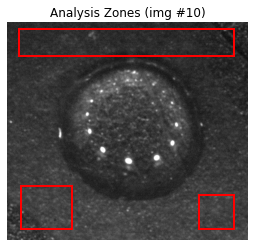

In [25]:
gl.zones.show(10)  # show zones on 10-th image

# Load / save with custom filenames

Loading and saving data can accept custom filenames as arguments, without extensions (they are added automatically, with `.tsv` for analysis data, and `.json` for metadata, e.g. (lines below should follow a `gl.run()` so that `gl.data` is defined):

In [28]:
gl.save('Img_GreyLevel_SavingTest')  # generates both .json and .tsv files

In [29]:
data = gl.load('Img_GreyLevel_SavingTest')  # loads from .tsv file
data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,66.132589,85.909301,85.130828
5,img1,img-00615.png,1.599832e+09,65.873049,85.767413,85.029188
10,img1,img-00620.png,1.599832e+09,65.703018,85.538601,84.929872
15,img1,img-00625.png,1.599832e+09,65.911820,85.840350,85.068191
20,img1,img-00630.png,1.599832e+09,65.832815,85.821329,85.081364


# Access individual images

`GreyLevel` inherits from `ImageSeries` so that its methods are available, e.g.

In [30]:
gl = GreyLevel(paths=folders, savepath=basefolder)

In [31]:
gl.files[33]

filo.File #33 [img-00643.png in folder 'data\img2']

In [32]:
gl.files[33].file

WindowsPath('data/img2/img-00643.png')

In [33]:
gl.read(33)  # read image num 33 as an array

array([[ 69,  68,  72, ...,  69,  65,  56],
       [ 65,  54,  52, ...,  59,  59,  65],
       [ 65,  59,  59, ...,  61,  66,  63],
       ...,
       [ 81,  90,  77, ...,  92,  90, 103],
       [ 80,  91,  81, ...,  91,  90,  98],
       [ 89,  83,  83, ...,  87,  94, 103]], dtype=uint8)

<AxesSubplot:title={'center':'img-00643.png (#33)'}>

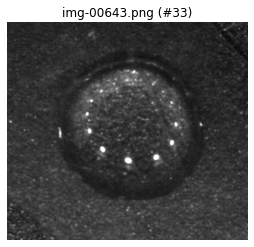

In [34]:
gl.show(33)